In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import csv

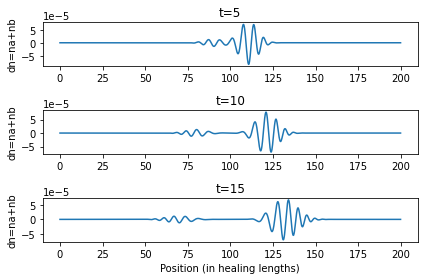

In [11]:
#plotting relative densities of the components in space and time
a=[]
b=[]
x=np.arange(0,200,0.125) #gridspace
n_0=0.0025

#gathering results data form results.txt and storing in variables a and b
with open('results.txt','r') as csvfile:
    plots=csv.reader(csvfile, delimiter=',')
    for row in plots:
        a.append(row[::2]) #even row elements are condensate a
        b.append(row[1::2]) #odd row elements are condensate b

a=np.array(a).astype(float)
b=np.array(b).astype(float)

Figure, (ax1, ax2, ax3)=plt.subplots(3)
ax1.plot(x,a[5]-b[5])
ax1.set_title('t=5')
ax1.set_ylabel('dn=na+nb')
#ax1.set_ylim([0, 0.006])
ax2.plot(x,a[10]-b[10])
ax2.set_title('t=10')
ax2.set_ylabel('dn=na+nb')
#ax2.set_ylim([0, 0.006])
ax3.plot(x,a[15]-b[15])
ax3.set_title('t=15')
#ax3.set_ylim([0, 0.006])
ax3.set_xlabel('Position (in healing lengths)')
ax3.set_ylabel('dn=na+nb')
Figure.tight_layout()
plt.show()

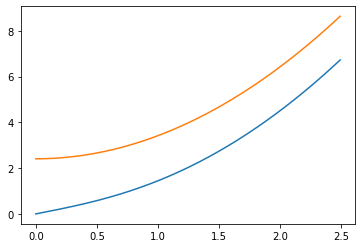

In [3]:
#plotting dimensionless dispersion relation of spectra for density and spin modes
k=np.arange(0,2.5,0.01)
w1=[]
w2=[]
gfraction=0.1
omega=1 #in gn

for x in k:
    temp1=x*np.sqrt(np.power(x,2)+1+gfraction)
    w1.append(temp1)

for x in k:
    temp2=np.sqrt(np.power(x,2)*(np.power(x,2)+1-gfraction+4*omega)+2*omega*(1-gfraction+2*omega))
    w2.append(temp2)

#print(w1)
plt.plot(k, w1)
plt.plot(k, w2)

In [4]:
#finding dw/dk to get an idea of group velocity of spin mode
